# 1.

https://github.com/deeplearningzerotoall/PyTorch/blob/master/RNN/4-longseq.ipynb

longsequence

In [1]:
import torch
import torch.optim as optim
import numpy as np

In [2]:
torch.manual_seed(2020)

In [3]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [4]:
char_set = list(set(sentence))
char_dic = {c: i for i, c in enumerate(char_set)}

In [5]:
char_dic # 빈도수가아니라 index넘버

{'c': 0,
 'r': 1,
 'd': 2,
 'w': 3,
 'l': 4,
 's': 5,
 'g': 6,
 ',': 7,
 ' ': 8,
 'u': 9,
 'm': 10,
 '.': 11,
 'n': 12,
 'p': 13,
 'e': 14,
 'a': 15,
 'y': 16,
 'k': 17,
 'b': 18,
 'o': 19,
 't': 20,
 'h': 21,
 "'": 22,
 'i': 23,
 'f': 24}

parameter 임의로 한 값씩 설정함

In [6]:
dic_size = len(char_dic) # 단어 unique 개수
hidden_size = len(char_dic)# 단어 unique 개수
sequence_length = 10  # Any arbitrary number
learning_rate = 0.1

print(dic_size)
print(hidden_size)

25
25


In [7]:
# data setting
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index

x_one_hot = [np.eye(dic_size)[x] for x in x_data]

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

한칸씩 옮겨간다

In [8]:
print(type(x_one_hot))
print(len(x_one_hot))


<class 'list'>
170


In [9]:
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

X.shape

torch.Size([170, 10, 25])

In [10]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True) #rnn
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True) #(마지막) fc layer

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [11]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x


net = Net(dic_size, hidden_size, 2)

In [12]:
# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [13]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        # print(i, j, ''.join([char_set[t] for t in result]), loss.item())
        if j == 0:
            predict_str += ''.join([char_set[t] for t in result])
        else:
            predict_str += char_set[result[-1]]

    print(predict_str)

lylylyyyllyllylyylylyylylylyylylylylgyylylllllllyylllylyllylylyllyllllylllsyllllglylyylyyllyyllyylylyyyllllyllyyylylylylyllylllyllyllyllylyllylyylylyllllllylyyyyyllyyyyllysllllyll
tttt ttt h tt tt tttt ttttt tt h ttt t t  t t ttttt httt  tt tt ht t tt  tt tttt h tt ttt ttttt t  tttt t tt ht tt tt  ttt ttt t tt t tt tt h tt htttttt tt tttt tt ttttt tttttttt 
o  o   o o  o oo  o  o  e    o  o  o o oo o   o   o oe   o   oo oe  o o   oo   o oo       o o  oo  o   e   o o o o  o  o  o       oe oe  o  oe o  oo  o  oe  eeo o   o      oe oe  
tr.orksorkr..l....k..kt..lrk.krk.l.ktk.k......kr.khr..or.kk..kh...t.kt..l.k.k..k.k.l.k.k.k..kk..k..ku..kt..krk.lrkrk.kskt..l..kt..kt..h..ko..hr..h.lrk...k...k...k.k.k......k...k.k
eraor roror rslraipsaororlrorororororlrohl rorlra hrlrlr  lhrorltrallrorlr r trororor ror  otp roralror rororlrororlroror rltr rlior roralrl hdororor ror rororlrlr iororraloairhrl
eethe eahdae u hs eahe hs he h hhs h hahhd h  d hahhhs hd hahaod eahd hs hs d hs h hhe ha hs h  hes 

p you want to build a ship, don't arum up people together to collect wood and don't assign them tasks and work, but rather teach them ta long for the endless immensity of the sea 
p you want to build a ship, don't arum up people together to collect wood and don't assign them tosks and work, but rather teach them ta long for the endless immensity of the sea 
p you want to build a ship, don't drum up people together to collect wood and don't dssign them tasks and work, but rather teach them ta long for the endless immensity of the seac
p you want to build a ship, don't arum up people together to collect wood and don't assign them tasks and work, but rather teach them ta long for the endless immensity of the seac
l you want to build a ship, don't arum up people together to collect wood and don't assign them tasks and work, but rather teach them ta long for the endless immensity of the seac
l you want to build a ship, don't drum up people together to collect wood and don't dssign them task

g you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
t you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
t you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
l you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
l you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.
m you want to build a ship, don't drum up people together to collect wood and don't assign them task

l you want to build a ship, don't drum up people together to collect wood and don't dssign them tasks and work, but rather teach them ta long for the endless immensity of the seac

(lol)

# 2.  

https://tutorials.pytorch.kr/intermediate/char_rnn_classification_tutorial.html  

문자단위 (한글자)로 수천개 surname을 훈련시켜서 어떤 언어일까

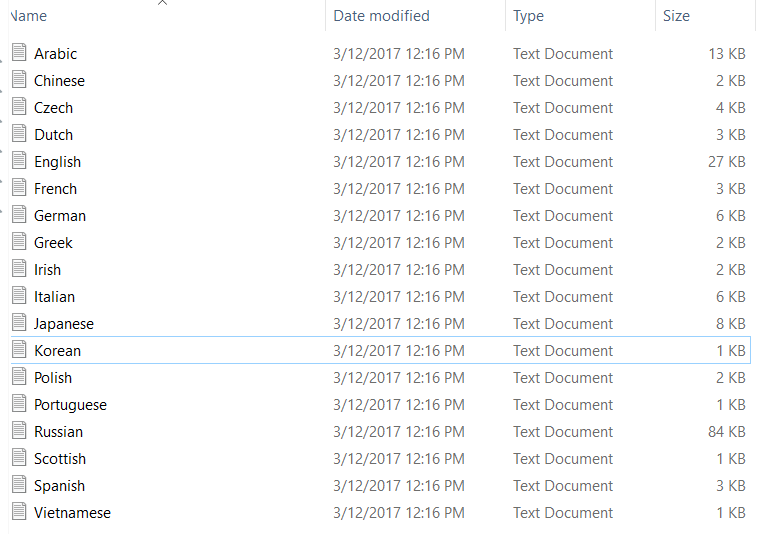

러시안, 영어, 아라빅이 길다

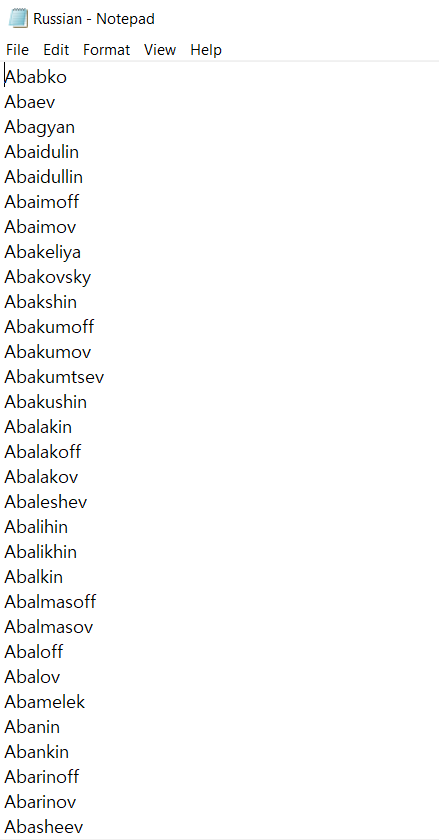

In [14]:
import os

path = os.getcwd()

print(path)

C:\Users\drlim


In [15]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob

In [16]:
def findFiles(path): return glob.glob(path)

print(findFiles('C:/Users/drlim/.ipynb_checkpoints/data/names/*.txt'))

['C:/Users/drlim/.ipynb_checkpoints/data/names\\Arabic.txt', 'C:/Users/drlim/.ipynb_checkpoints/data/names\\Chinese.txt', 'C:/Users/drlim/.ipynb_checkpoints/data/names\\Czech.txt', 'C:/Users/drlim/.ipynb_checkpoints/data/names\\Dutch.txt', 'C:/Users/drlim/.ipynb_checkpoints/data/names\\English.txt', 'C:/Users/drlim/.ipynb_checkpoints/data/names\\French.txt', 'C:/Users/drlim/.ipynb_checkpoints/data/names\\German.txt', 'C:/Users/drlim/.ipynb_checkpoints/data/names\\Greek.txt', 'C:/Users/drlim/.ipynb_checkpoints/data/names\\Irish.txt', 'C:/Users/drlim/.ipynb_checkpoints/data/names\\Italian.txt', 'C:/Users/drlim/.ipynb_checkpoints/data/names\\Japanese.txt', 'C:/Users/drlim/.ipynb_checkpoints/data/names\\Korean.txt', 'C:/Users/drlim/.ipynb_checkpoints/data/names\\Polish.txt', 'C:/Users/drlim/.ipynb_checkpoints/data/names\\Portuguese.txt', 'C:/Users/drlim/.ipynb_checkpoints/data/names\\Russian.txt', 'C:/Users/drlim/.ipynb_checkpoints/data/names\\Scottish.txt', 'C:/Users/drlim/.ipynb_checkpoi

In [17]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

print(n_letters)
print(all_letters)

57
abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'


In [18]:
# unicode to ascii란다

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

Slusarski


In [19]:
category_lines = {}
all_categories = []

### R에서의 readlines와 똑같이 줄단위로 쪼개기

In [20]:
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('C:/Users/drlim/.ipynb_checkpoints/data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

n_categories

18

In [21]:
print(category_lines['Korean'][:10])
print(category_lines['Japanese'][:10])
print(category_lines['French'][:10])
print(category_lines['Spanish'][:10])

['Ahn', 'Baik', 'Bang', 'Byon', 'Cha', 'Chang', 'Chi', 'Chin', 'Cho', 'Choe']
['Abe', 'Abukara', 'Adachi', 'Aida', 'Aihara', 'Aizawa', 'Ajibana', 'Akaike', 'Akamatsu', 'Akatsuka']
['Abel', 'Abraham', 'Adam', 'Albert', 'Allard', 'Archambault', 'Armistead', 'Arthur', 'Augustin', 'Babineaux']
['Abana', 'Abano', 'Abarca', 'Abaroa', 'Abascal', 'Abasolo', 'Abel', 'Abello', 'Aberquero', 'Abreu']


In [22]:
import torch

In [23]:
def letterToIndex(letter):
    return all_letters.find(letter)

In [24]:
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

In [25]:
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [26]:
print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [27]:
import torch.nn as nn

In [28]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [29]:
input = letterToTensor('A')
hidden =torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [30]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.9606, -2.9304, -2.8134, -2.9754, -2.9614, -2.9664, -2.9652, -2.9071,
         -2.8079, -2.9018, -2.8834, -2.9169, -2.9778, -2.8704, -2.8543, -2.7824,
         -2.7516, -2.8439]], grad_fn=<LogSoftmaxBackward>)


In [31]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1) # 텐서의 가장 큰 값 및 주소
    category_i = top_i[0].item()     # 텐서에서 정수 값으로 변경
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Spanish', 16)


In [32]:
import random

In [33]:
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

In [34]:
for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Japanese / line = Watoga
category = Spanish / line = Agramunt
category = Japanese / line = Matsushita
category = Greek / line = Kouros
category = English / line = Duncan
category = Vietnamese / line = Do
category = Italian / line = Selvaggio
category = Polish / line = Pasternak
category = Polish / line = Stanek
category = English / line = Godfrey


In [35]:
criterion = nn.NLLLoss() #negative log likelihood. softmax loss, kl divergence loss

In [36]:
learning_rate = 0.005 # 이것을 너무 높게 설정 : 발산, 작게 : saddle point, local min 빠지거나 학습이 잘 안됨

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # 매개변수의 경사도에 학습률을 곱해서 그 매개변수의 값에 더해
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [37]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

In [38]:
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 35s) 2.9295 Chong / Chinese ✗ (Korean)
10000 10% (1m 10s) 1.9694 Madeira / Spanish ✗ (Portuguese)
15000 15% (1m 50s) 1.2847 D'angelo / Italian ✓
20000 20% (2m 36s) 1.5879 Peng / Chinese ✓
25000 25% (3m 21s) 1.0453 Auer / German ✓
30000 30% (4m 3s) 2.2979 Tikal / Arabic ✗ (Czech)
35000 35% (4m 40s) 1.5344 Boucher / French ✓
40000 40% (5m 9s) 1.3378 Shenagin / Russian ✓
45000 45% (5m 43s) 0.4929 Vinci / Italian ✓
50000 50% (6m 18s) 0.1342 Pispinis / Greek ✓
55000 55% (7m 6s) 0.1037 Manoukarakis / Greek ✓
60000 60% (8m 6s) 0.3243 Wechsler / German ✓
65000 65% (8m 50s) 0.1334 Mitzusaka / Japanese ✓
70000 70% (9m 49s) 1.1670 Hanika / Japanese ✗ (Czech)
75000 75% (10m 23s) 2.0467 Solomon / English ✗ (French)
80000 80% (11m 7s) 1.2852 Nelissen / Dutch ✓
85000 85% (11m 50s) 0.8178 Filipek / Polish ✓
90000 90% (12m 25s) 0.6426 Suh / Korean ✓
95000 95% (13m 5s) 2.3931 Maolmhuaidh / Japanese ✗ (Irish)
100000 100% (13m 34s) 3.2181 Konoe / English ✗ (Japanese)


In [39]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

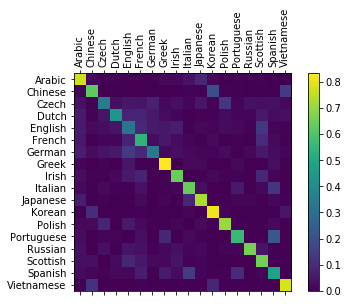

In [40]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# 주어진 라인의 출력 반환
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

In [41]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.85) Czech
(-1.34) Russian
(-1.70) English

> Jackson
(-0.27) Scottish
(-1.97) English
(-3.07) Russian

> Satoshi
(-1.41) Arabic
(-1.50) Polish
(-1.60) Italian
